In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
import os
import glob
import seaborn as sns

In [2]:
DATA_DIR = "./data"

input_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(DATA_DIR, "train/output_2023_w*.csv")))

df_in = pd.concat((pd.read_csv(p) for p in tqdm(input_files, desc="loading inputs")), ignore_index=True)
df_out = pd.concat((pd.read_csv(p) for p in tqdm(output_files, desc="loading outputs")), ignore_index=True)

test_in = pd.read_csv(os.path.join(DATA_DIR, "test_input.csv"))
test_template = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
sample_submission = pd.read_csv(os.path.join(DATA_DIR, "sample_submission.csv"))

print("Inputs:", df_in.shape, "Outputs:", df_out.shape, "Test input:", test_in.shape)

loading inputs:   0%|          | 0/18 [00:00<?, ?it/s]

loading outputs:   0%|          | 0/18 [00:00<?, ?it/s]

Inputs: (4880579, 23) Outputs: (562936, 6) Test input: (49753, 23)


In [3]:
output_size = df_in.groupby(['game_id','play_id'])['num_frames_output'].mean()

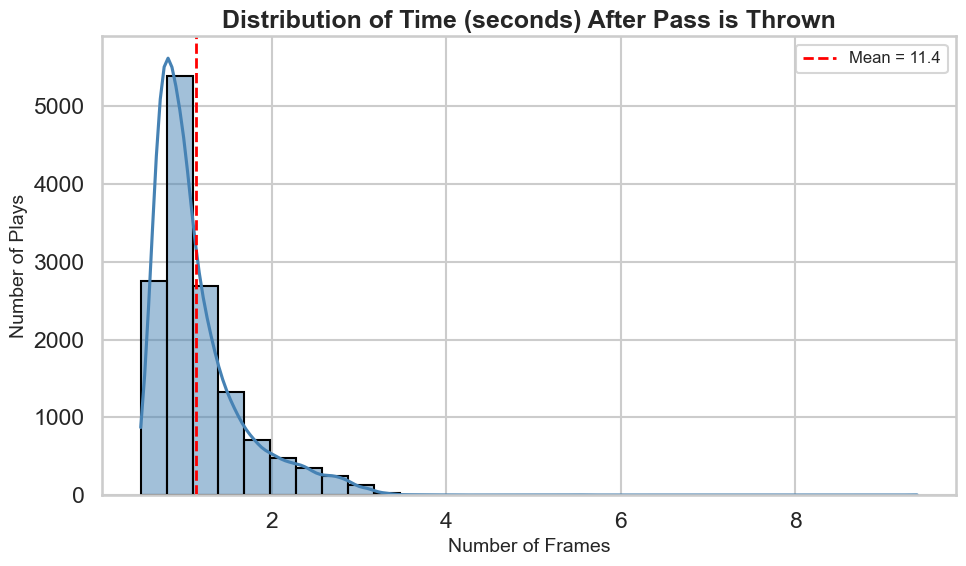

In [13]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.histplot(output_size.values/10, bins=30, kde=True, color='steelblue', edgecolor='black')

plt.title("Distribution of Time (seconds) After Pass is Thrown", fontsize=18, weight='bold')
plt.xlabel("Number of Frames", fontsize=14)
plt.ylabel("Number of Plays", fontsize=14)

plt.axvline(output_size.mean()/10, color='red', linestyle='--', linewidth=2, label=f"Mean = {output_size.mean():.1f}")
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
output_size.value_counts().tail(10)

num_frames_output
29.0    62
31.0    35
30.0    29
32.0    12
33.0     9
34.0     4
36.0     2
94.0     1
40.0     1
55.0     1
Name: count, dtype: int64

In [6]:
input_size = df_in.groupby(['game_id','play_id'])['frame_id'].nunique()

In [30]:
df_in[df_in['frame_id'] == 123]

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y,final_frame_prediction
2649209,2023111210,2267,False,53503,123,right,59,Benjamin St-Juste,6-3,205,1997-09-08,CB,Defense,Defensive Coverage,68.66,8.75,4.99,1.52,125.16,242.35,8,60.16,25.41,0
2649332,2023111210,2267,False,46329,123,right,59,Danny Johnson,5-9,190,1995-11-17,CB,Defense,Defensive Coverage,68.89,40.78,4.03,3.69,93.05,181.95,8,60.16,25.41,0
2649455,2023111210,2267,False,53448,123,right,59,Jamin Davis,6-4,234,1998-12-12,OLB,Defense,Defensive Coverage,69.69,29.46,4.42,1.58,57.93,295.67,8,60.16,25.41,0
2649578,2023111210,2267,False,52624,123,right,59,Kam Curl,6-2,203,1999-03-03,SS,Defense,Defensive Coverage,78.57,13.38,4.40,0.46,117.33,267.84,8,60.16,25.41,0
2649701,2023111210,2267,False,43373,123,right,59,Kendall Fuller,5-11,198,1995-02-13,CB,Defense,Defensive Coverage,75.75,44.71,5.24,0.98,73.46,167.73,8,60.16,25.41,0
2649824,2023111210,2267,False,54578,123,right,59,Percy Butler,6-0,191,2000-05-05,SS,Defense,Defensive Coverage,82.33,33.01,4.29,1.28,94.42,236.30,8,60.16,25.41,0
2649947,2023111210,2267,False,55912,123,right,59,Quan Martin,6-0,195,2000-04-17,FS,Defense,Defensive Coverage,68.80,18.43,2.47,3.01,58.62,287.47,8,60.16,25.41,0
2650070,2023111210,2267,False,47847,123,right,59,DK Metcalf,6-4,230,1997-12-14,WR,Offense,Other Route Runner,69.11,7.08,6.02,0.45,126.67,60.56,8,60.16,25.41,0
2650193,2023111210,2267,False,55884,123,right,59,Jaxon Smith-Njigba,6-0,198,2002-02-14,WR,Offense,Other Route Runner,71.45,34.04,7.26,3.82,130.15,170.98,8,60.16,25.41,0
2650316,2023111210,2267,False,47803,123,right,59,Noah Fant,6-4,249,1997-11-20,TE,Offense,Other Route Runner,70.55,16.61,7.30,4.34,57.88,207.77,8,60.16,25.41,0


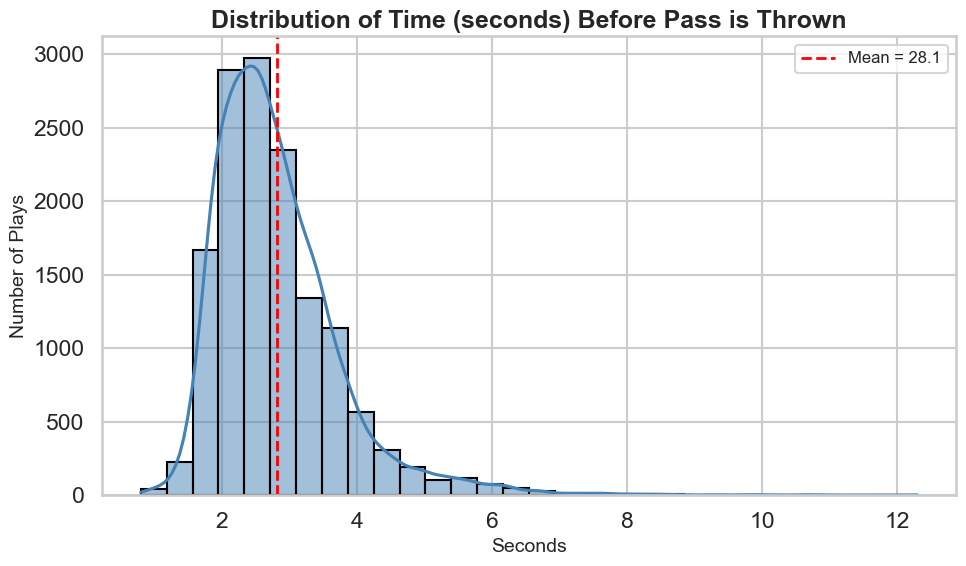

In [12]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))
sns.histplot(input_size.values/10, bins=30, kde=True, color='steelblue', edgecolor='black')

plt.title("Distribution of Time (seconds) Before Pass is Thrown", fontsize=18, weight='bold')
plt.xlabel("Seconds", fontsize=14)
plt.ylabel("Number of Plays", fontsize=14)

plt.axvline(input_size.mean()/10, color='red', linestyle='--', linewidth=2, label=f"Mean = {input_size.mean():.1f}")
plt.legend(fontsize=12)
###
plt.tight_layout()
plt.show()

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_in.loc[df_in['num_frames_output'] > 50,:]

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
283321,2023091100,3167,True,54650,1,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.44,38.31,0.35,0.08,113.32,41.96,94,9.720000,45.459999
283322,2023091100,3167,True,54650,2,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.45,38.32,0.29,0.11,108.90,41.96,94,9.720000,45.459999
283323,2023091100,3167,True,54650,3,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.47,38.36,0.26,0.13,94.48,44.66,94,9.720000,45.459999
283324,2023091100,3167,True,54650,4,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.49,38.41,0.25,0.41,72.10,45.94,94,9.720000,45.459999
283325,2023091100,3167,True,54650,5,left,33,Christian Benford,6-1,205,2000-09-21,CB,Defense,Defensive Coverage,31.51,38.44,0.29,1.53,39.62,49.27,94,9.720000,45.459999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039381,2023122100,1450,True,43415,29,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,48.81,35.78,6.26,3.49,276.70,269.09,55,45.630001,47.900002
4039382,2023122100,1450,True,43415,30,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,48.20,35.87,5.90,4.35,280.53,274.35,55,45.630001,47.900002
4039383,2023122100,1450,True,43415,31,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,47.64,36.00,5.64,4.78,286.37,281.69,55,45.630001,47.900002
4039384,2023122100,1450,True,43415,32,left,62,Demarcus Robinson,6-1,203,1994-09-21,WR,Offense,Targeted Receiver,47.13,36.20,5.37,5.68,294.06,292.35,55,45.630001,47.900002


In [14]:
gcol = ['game_id','play_id','nfl_id']

In [15]:
final_frame = df_in.groupby(gcol).tail(1)

In [17]:
player_predict_final = final_frame[final_frame['player_to_predict'] == True]
player_predict_final = player_predict_final[gcol + ['frame_id']]

In [19]:
df_in = df_in.copy()  # avoid SettingWithCopyWarning

is_final_frame = pd.MultiIndex.from_frame(df_in[['game_id','play_id','nfl_id','frame_id']]).isin(
    pd.MultiIndex.from_frame(player_predict_final)
)

df_in['final_frame_prediction'] = np.where(is_final_frame, 1, 0)

In [27]:
# distribution of positions for prediction for all consider players in the final frame of prethrow
df_in.loc[df_in['final_frame_prediction'] == 1, ['player_position']].value_counts()

player_position
CB                 13275
WR                  8611
FS                  5161
SS                  4169
ILB                 3685
TE                  3249
OLB                 2634
MLB                 2568
RB                  2111
DE                   234
S                    166
FB                    79
DT                    47
QB                    35
NT                    18
T                      2
LB                     1
Name: count, dtype: int64

In [31]:
df_in.loc[(df_in['game_id'] ==2023090700) & (df_in['play_id'] == 101)]


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,player_birth_date,player_position,player_side,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y,final_frame_prediction
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22,0
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22,0
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22,0
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22,0
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,1999-09-07,FS,Defense,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2023090700,101,True,44930,22,right,42,Josh Reynolds,6-3,196,1995-02-16,WR,Offense,Targeted Receiver,49.34,14.37,7.54,2.67,89.24,98.27,21,63.259998,-0.22,0
230,2023090700,101,True,44930,23,right,42,Josh Reynolds,6-3,196,1995-02-16,WR,Offense,Targeted Receiver,50.10,14.36,7.63,2.75,91.73,102.82,21,63.259998,-0.22,0
231,2023090700,101,True,44930,24,right,42,Josh Reynolds,6-3,196,1995-02-16,WR,Offense,Targeted Receiver,50.87,14.32,7.73,2.62,94.02,104.15,21,63.259998,-0.22,0
232,2023090700,101,True,44930,25,right,42,Josh Reynolds,6-3,196,1995-02-16,WR,Offense,Targeted Receiver,51.65,14.25,7.86,2.74,96.68,101.98,21,63.259998,-0.22,0


In [ ]:
#plot counts of positions